## Projectile Motion

A Python notebook for calculating projectile motion.

In [7]:
#first we import some modules - these are collections of pre-existing functions that we can use

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import astropy.units as u
import astropy.constants as const

%matplotlib notebook

In [8]:
#this will setup the animation of the projectile. Don't worry about understanding it!


def plot_projectile(xs,ys,R_body):
    if xs is None:
        xs = np.zeros_like(ys)
    if ys is None:
        ys = np.zeros_like(xs)
    
    fig, ax = plt.subplots(figsize=(5,5))

    #ax.fill([-100,-100,100,100],[-100,0,0,-100],fc='gray',alpha=0.2,zorder=-1)
    #ax.fill([-100,-100,0,0],[0,100,100,0],fc='gray',alpha=0.2,zorder=-1)
    
    circle = plt.Circle((0,0),R_body,color='b',ec='None',alpha=0.5)
    
    ax.add_patch(circle)
    
        
    lims = R_body * 2

    ax.set_xlim(-lims,lims)
    ax.set_ylim(-lims,lims)

    solid_point, = ax.plot(xs[0],ys[0],marker='o',markerfacecolor='lightblue',markeredgecolor='navy',markersize=10,zorder=1)
    tracer_points, = ax.plot(xs[0],ys[0],marker='None',markerfacecolor='None',markeredgecolor='navy',markersize=10,color='navy',alpha=0.5,zorder=0)

    def update(i):
        solid_point.set_data(xs[i],ys[i])
        tracer_points.set_data(xs[0:i+1],ys[0:i+1])
        #tracer_points_x.set_data(xs[0:i+1],-1*np.ones_like(xs[0:i+1]))
        #tracer_points_y.set_data(-1*np.ones_like(ys[0:i+1]),ys[0:i+1])
        return


    return fig, ax, update

Now we can simulate the projectile's motion!

In [9]:
#define the starting conditions for the problem:

height = 0 #m
initial_velocity = 16628 #17742.5 #m/s
angle = 0 #degrees



#define properties of object we're orbiting (e.g. the Earth)
G_const = 6.674e-11

M_body = 1.02e26 #kg
R_body = 24622*1000 #m





#the ball will be calculated at several time intervals. Here we define the timestep:

dt = 10 #timestep in seconds
max_steps = 50000 #maximum number of timesteps

#we will store the x- and y-positions of the ball in an array. Let's set them up now:

xs = np.array([0],dtype=float) #starting position at x=0
ys = np.array([height+R_body],dtype=float) #starting position at y=0

x_vel = initial_velocity * np.cos(np.deg2rad(angle)) #m/s
y_vel = initial_velocity * np.sin(np.deg2rad(angle)) #m/s


for i in range(max_steps):
    x_pos = xs[i] #load in the previous position
    y_pos = ys[i]
    
    radius = np.sqrt(x_pos**2 + y_pos**2)
    
    #use the gravity equation to calculate the acceleration felt due to this body
    x_accel = - x_pos * G_const * M_body / radius**3
    y_accel = - y_pos * G_const * M_body / radius**3

    x_vel = x_vel + x_accel * dt #calculate the new x velocity
    y_vel = y_vel + y_accel * dt #calculate the new y velocity    
    
    x_pos = x_pos + (x_vel * dt) #calculate the new x position
    y_pos = y_pos + (y_vel * dt) #calculate the new y position
    
    
    #if radius <= R_body: #check to see if we've hit the ground
     #   break #stop the loop
    #else:
    xs = np.append(xs,x_pos)
    ys = np.append(ys,y_pos)

max_time = dt * (len(ys)-1) #show the time before the ball hit the ground 

print('Time taken: t={:.2f}s'.format(max_time))
#print('Distance traveled: x={:.1f}m'.format(xs.max()))


print(len(xs))

Time taken: t=500000.00s
50001


<IPython.core.display.Javascript object>


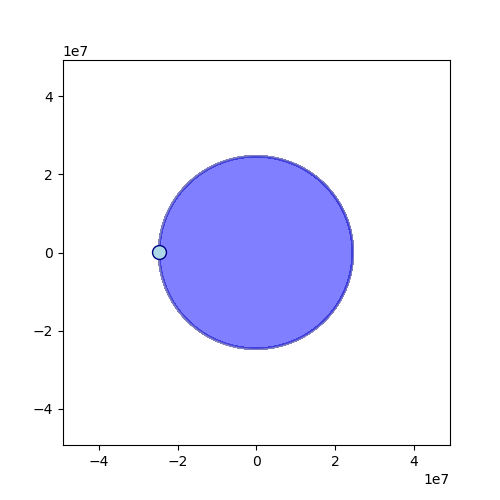

In [10]:
#now we can show an animation of the ball:

fig, ax, update = plot_projectile(xs,ys,R_body)

anim = animation.FuncAnimation(fig
                                ,func=update
                                ,frames=len(ys)
                                ,interval=1
                                ,blit=True
                                ,repeat=True
                                ,repeat_delay=0)

plt.show() #display the figure!

In [11]:
print(xs)

print(ys)

[        0.            166280.            332552.41621318 ...
 -24584859.85797621 -24600767.12482801 -24615563.92891271]
[24622000.         24620877.10352077 24618631.28496287 ...
 -2447689.24852041 -2282741.79153347 -2117691.29305382]


In [12]:
1, 2

(1, 2)